this notebook is about building a model on flickr8k dataset that has several images and their captions in a file captions.txt an image can have more than one caption and it the end there's a test and also result explanation

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import pickle

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
import pickle
from tqdm import tqdm
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical


2025-09-08 13:44:54.353575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757339094.696114      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757339094.792797      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import pickle
from tqdm.notebook import tqdm

in the line of code below preparing the model VGG16 for the images to extract features

In [ ]:
base_dir = "/kaggle/input/flickr8k"
model_vgg = VGG16()
model_vgg = Model(inputs=model_vgg.inputs, outputs=model_vgg.layers[-2].output)

I0000 00:00:1757339113.037349      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1757339113.038237      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:

model_vgg.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

read each image in the folder images and do inference to get the image features then keep these features in a dictionnary , key is the name of the image excluding the extension and the value is the features of the image predicted by VGG16

In [ ]:
features = {}
directory = os.path.join(base_dir, "Images")
print(directory)

for filename in tqdm(os.listdir(directory)):
    img_path = os.path.join(directory, filename)
    img = load_img(img_path, target_size=(224,224))
    img = img_to_array(img)
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    image = preprocess_input(img)
    feature = model_vgg.predict(image, verbose=0)
    image_id = filename.split(".")[0]
    features[image_id] = feature.flatten()  # Flatten to 1D for Dense layers


/kaggle/input/flickr8k/Images


  0%|          | 0/8091 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
I0000 00:00:1757339121.306609      97 service.cc:148] XLA service 0x789350004240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1757339121.308147      97 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1757339121.308171      97 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1757339121.492956      97 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1757339124.421719      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


save the features dictionnary 

In [ ]:
working_dir = "kaggle/working"
os.makedirs(working_dir, exist_ok=True)
with open(os.path.join(working_dir, "features.pkl"), "wb") as f:
    pickle.dump(features, f)

load it again 

In [ ]:
with open(os.path.join(working_dir, "features.pkl"), "rb") as f:
    features_pkl = pickle.load(f)


read the captions.txt file 

In [ ]:
with open(os.path.join(base_dir, "captions.txt"), 'r') as f:
    next(f)  # skip header
    captions_doc = f.read()

In [ ]:
!ls "kaggle/working"

features.pkl


split each line into image id (name) and captions then store them in a dictionnary (mappinng)

In [ ]:
mapping = {}
for line in tqdm(captions_doc.split("\n")):
    if len(line) < 2:
        continue
    description = line.split(",")
    if len(description) < 2:
        continue
    image_id, caption = description[0], description[1]
    image_id = image_id.split(".")[0]
    if image_id not in mapping:
        mapping[image_id] = []
    mapping[image_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

In [ ]:
len(mapping)

8091

as we can see one image has multiple captions

In [ ]:
mapping["1000268201_693b08cb0e"]

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

this is data cleaning process to remove punctations and lower the letters also remove additional spaces and add the <start> and <end> words for the decoder

In [ ]:
import re

def clean(mapping):
    for key, captions in mapping.items():
        cleaned_captions = []
        for caption in captions:
            caption = str(caption).lower()
            caption = re.sub(r"[^a-z]", " ", caption)
            caption = re.sub(r"\s+", " ", caption).strip()
            caption = "<start> " + " ".join([word for word in caption.split() if len(word) > 1]) + " <end>"
            cleaned_captions.append(caption)
        mapping[key] = cleaned_captions

clean(mapping)

store all the captions in the list all_captions and fit the tokenizer on captions

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

all_captions = [caption for key in mapping for caption in mapping[key]]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(caption.split()) for caption in all_captions)



we have 8258 unique words in the captions

In [ ]:
vocab_size

8258

this is a function used to read each caption it's a word by word predciton so we read each image's and tokenize them then store each index in the X2 array also the X1 array has the image feartures and y is the next word that we predict each time

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def data_generator(data_keys, mapping, features, tokenizer, max_len, vocab_size, batch_size):
    X1, X2, y = [], [], []
    n = 0
    while True:
        for key in data_keys:
            if key not in mapping or key not in features:
                continue
            if len(mapping[key]) == 0 or len(features[key]) == 0:
                continue
            for caption in mapping[key]:
                seq = tokenizer.texts_to_sequences([caption])[0]
                if len(seq) < 2:
                    continue
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_len, padding='post')[0]
                    out_seq = np.eye(vocab_size)[out_seq]

                    X1.append(features[key])
                    X2.append(in_seq)
                    y.append(out_seq)
                    n += 1

                    if n == batch_size:
                        yield (np.array(X1), np.array(X2)), np.array(y)
                        X1, X2, y = [], [], []
                        n = 0
        # yield remaining sequences if batch incomplete
        if n > 0:
            yield (np.array(X1), np.array(X2)), np.array(y)
            X1, X2, y = [], [], []
            n = 0


split data into trainin and testing 

In [ ]:
images_ids = list(mapping.keys())

split = int(len(images_ids)*0.90)
train = images_ids[:split]   # 6877 images
test = images_ids[split:]    # 1214 images


In [ ]:
len(train)

6877

features is a 1D array because we flattened it 

In [ ]:
print(features["1000268201_693b08cb0e"][0])
print(features["1000268201_693b08cb0e"])

2.5074754
[2.5074754 0.        0.        ... 0.        0.        0.       ]


now prepare the model layers and architecture so :
##### 1'st : inputs one represent the input kayer with shape of image features returned by VGG16 which id 4096 then we drop data by 40% we still have the same shape just 40% of each image feature is replaced by zeros to reduce overfiting

##### 2'nd : input layer for captions with shape max_length this max_length corresponds to the longest sentence in captions and all the sentences are padded because this layer expects same input shape , then embedd each for semantical meaning and dropout , then LSTM to return the next word 

##### 3'rd : in the decoder we add the two vectors image feature and caption and we perform a feed forward Dense layer with sigmoid to enrich the prediciton , finally a layer of probability distibution of all the words in the dataset we keep the one with highest probability


##### last we set the model and compile also i plotted it to see the architecture 



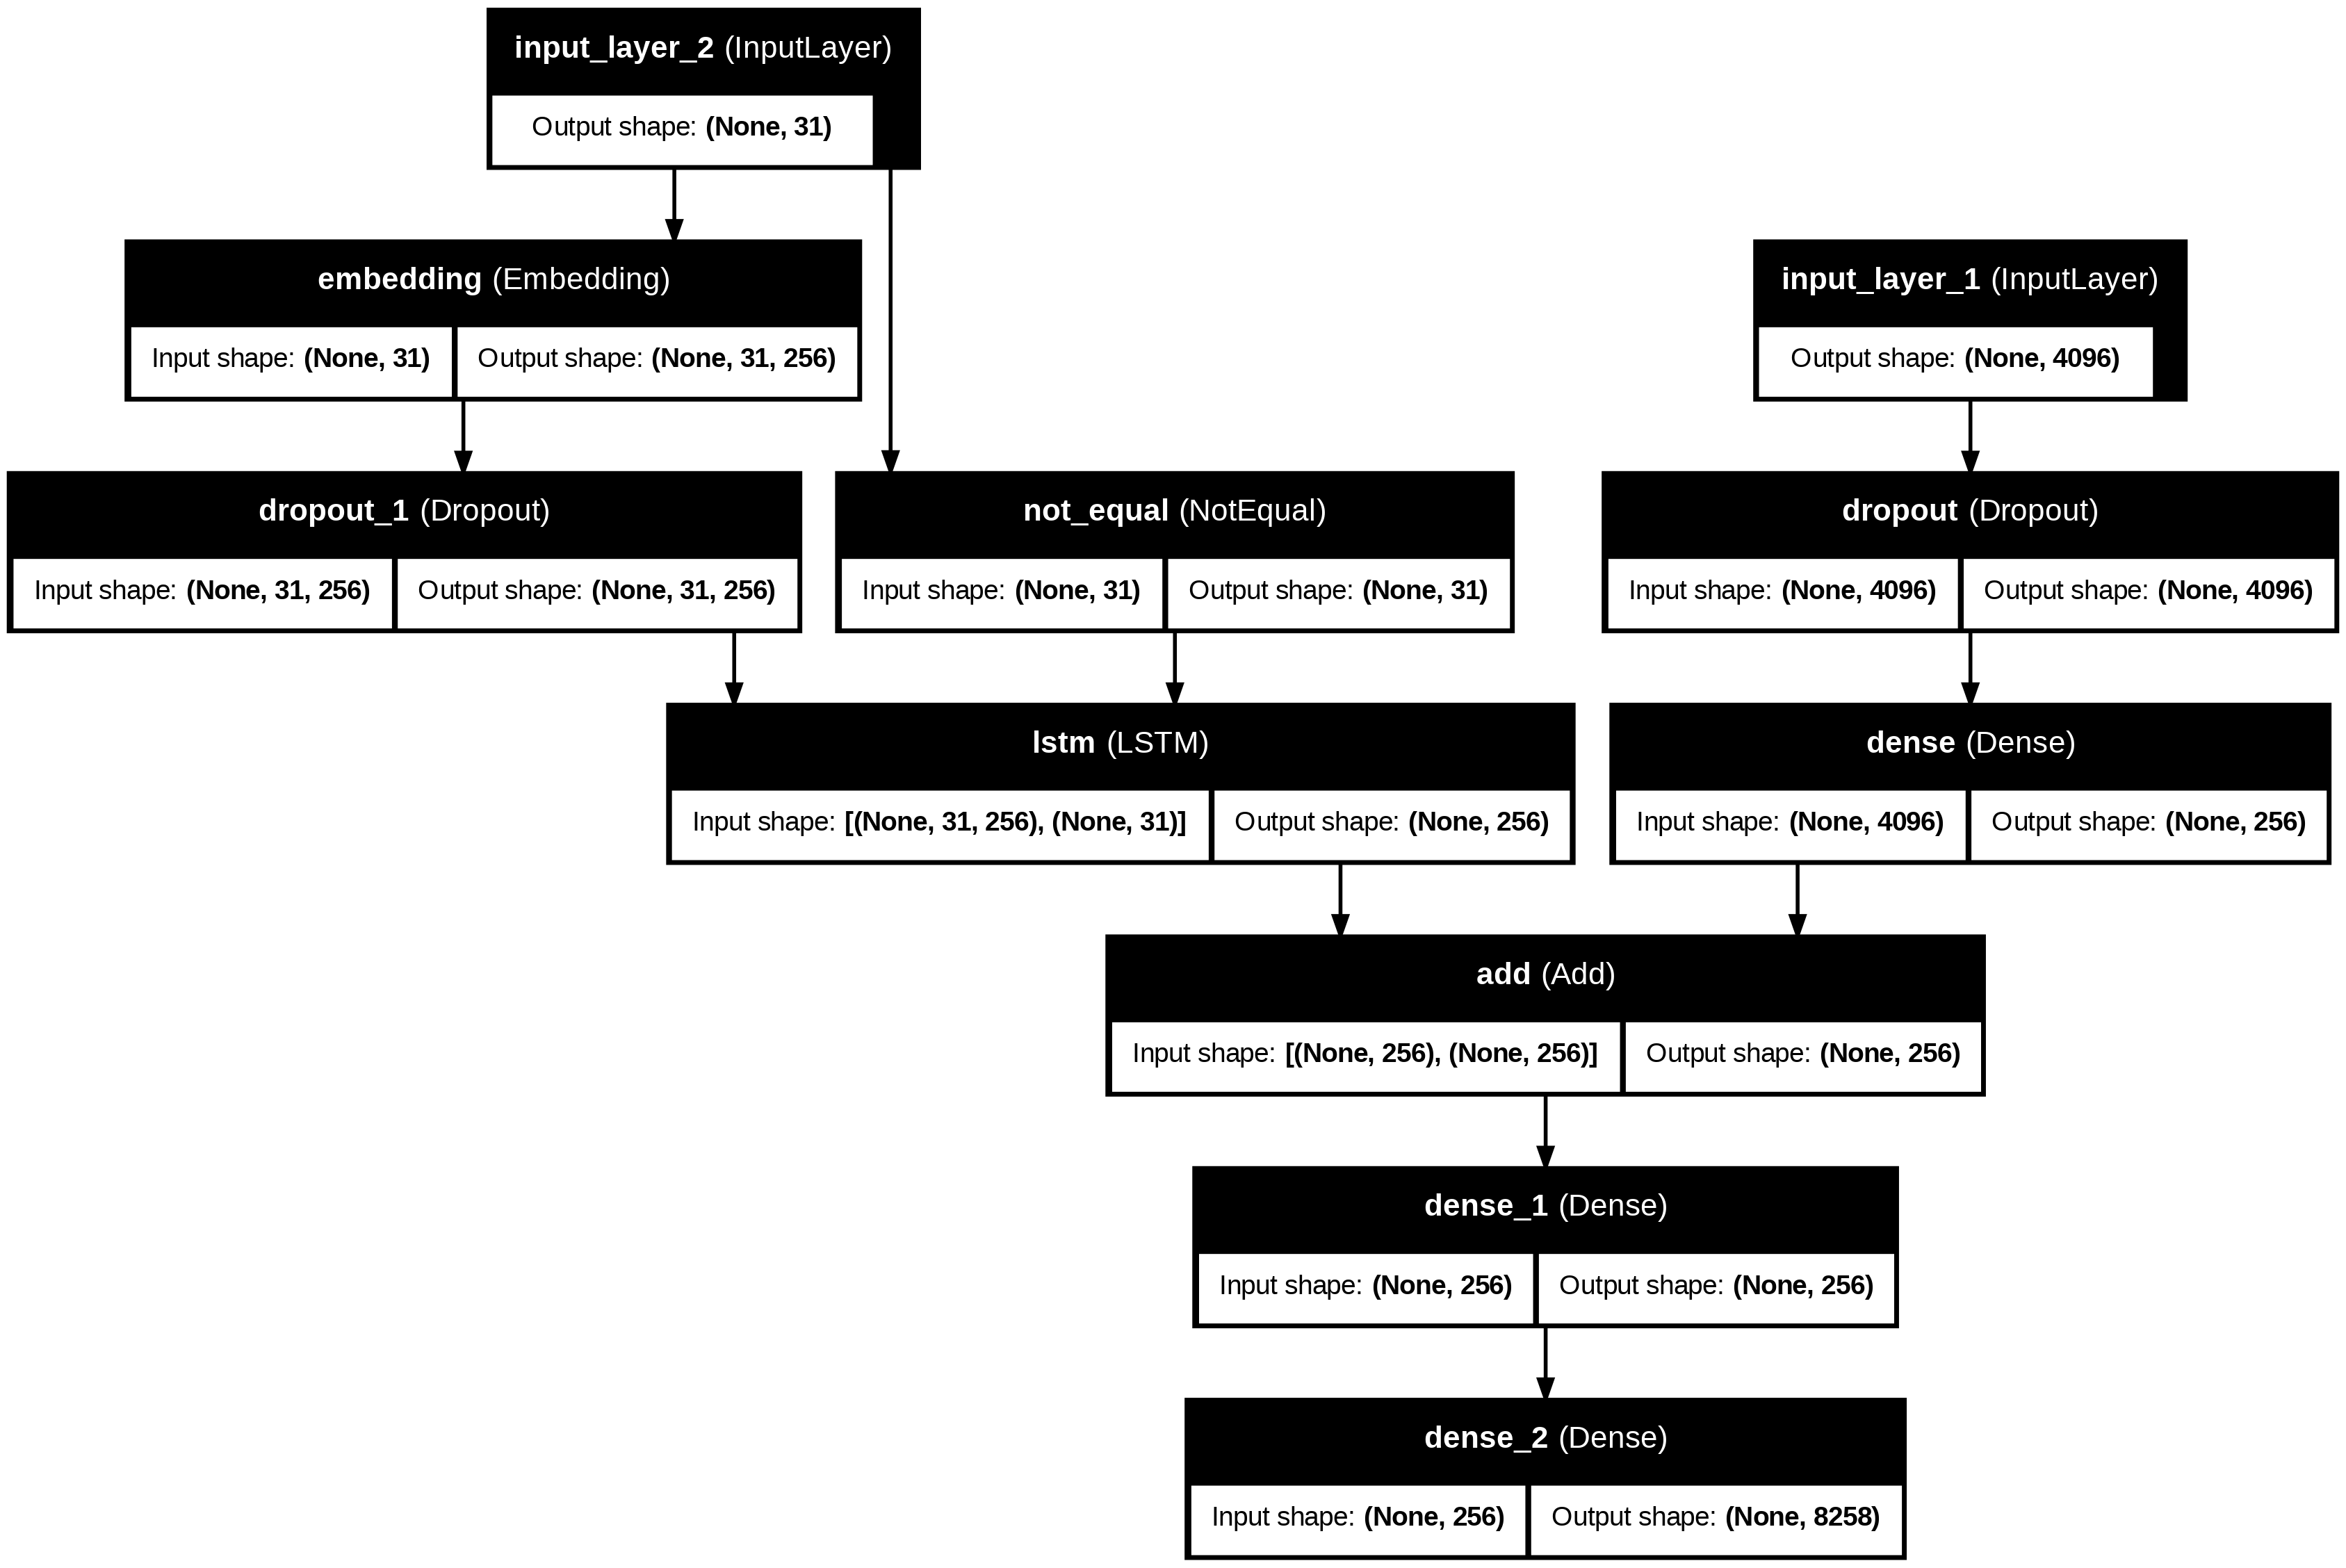

In [ ]:

from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Image feature extractor
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

# Sequence processor
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(
    256, 
    return_sequences=False, 
    recurrent_activation="sigmoid", 
    implementation=2, 
    use_cudnn=False
)(se2)



# Decoder
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

plot_model(model, show_shapes=True, show_layer_names=True)


### Important
in this project i used kaggle notebook this is the maximum epochs i could reach before the RAM is full then the kernel immediately dies so 12 epochs with batch size of 65 , and i got 2.51 loss which is not great 

In [ ]:

epochs = 12
batch_size = 65
steps = max(1, len(train)//batch_size)  # ensure steps >= 1

for i in range(epochs):
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

105/105 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - loss: 6.9085
105/105 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - loss: 5.2391
105/105 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - loss: 4.7155
105/105 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - loss: 4.3358
105/105 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - loss: 3.9334
105/105 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - loss: 3.6527
105/105 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - loss: 3.4089
105/105 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - loss: 3.1859
105/105 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - loss: 2.9817
105/105 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - loss: 2.8487
105/105 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - loss: 2.6807
105/105 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - loss: 2.5178


saving the model 

In [ ]:
model.save(working_dir+"/best_model.h5")

function to generate words from indexes

In [ ]:
def idx_to_word(integer, tokenizer):
    
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None


this is a function to predict caption we tokenize the text <start> and padd it then we call the model on the image and the start sequence , so it automatically generates words from features nad <start> till it reaches the length of the mogest sentnece in captions

In [ ]:
def predict_captions(model, image, tokenizer, max_length):
    
    in_text = "<start>"
    for i in range(max_length):
        # integer encode input text
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)

        # ensure image has batch dimension
        if image.ndim == 1:  
            image = np.expand_dims(image, axis=0)  # (4096,) -> (1, 4096)

        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        yhat = np.argmax(yhat)  # highest probability word

        # map index to word
        word = idx_to_word(yhat, tokenizer)

        if word is None:
            break
        in_text += " " + word
        if word == "<end>":
            break
    
    return in_text


and of course before applying the function we should make a prediciton on the image we want to get the caption for because we need features of the image

this is a test on the testing data that represents 10% OF THE DATASET  

In [ ]:
from tqdm import tqdm
from nltk.translate.bleu_score import corpus_bleu

actual, predicted = list(), list()

for key in tqdm(test):
    # actual captions (list of reference captions for this image)
    captions = mapping[key]
    
    # predicted caption
    y_pred = predict_captions(model, features[key], tokenizer, max_length)
    
    # tokenize (split into words)
    actual_captions = [caption.split() for caption in captions]
    y_pred_tokens = y_pred.split()
    
    actual.append(actual_captions)   # list of lists of reference tokens
    predicted.append(y_pred_tokens)  # list of predicted tokens

# Calculate BLEU scores
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
print("BLEU-3: %f" % corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0)))
print("BLEU-4: %f" % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))


100%|██████████| 1214/1214 [47:57<00:00,  2.37s/it]


BLEU-1: 0.121422
BLEU-2: 0.058176
BLEU-3: 0.027559
BLEU-4: 0.010851


this is a function that groups everything i explained before 

In [ ]:

def extract_features_existing(img_path, model_vgg):
    """
    Extract 4096-dim feature vector from an image using the existing VGG16 feature extractor.
    """
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    feature = model_vgg.predict(img, verbose=0)
    return feature.flatten()  # Flatten to 1D to match training features

# ----------------- 2. Prediction helpers -----------------
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

def predict_captions(model, image_feature, tokenizer, max_length):
    in_text = "<start>"
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)

        if image_feature.ndim == 1:
            image_feature = np.expand_dims(image_feature, axis=0)  # (4096,) -> (1, 4096)

        yhat = model.predict([image_feature, sequence], verbose=0)
        yhat = np.argmax(yhat)

        word = idx_to_word(yhat, tokenizer)
        if word is None:
            break

        in_text += " " + word
        if word == "<end>":
            break

    return in_text


test_image_path = "/kaggle/input/flickr8k/Images/1001773457_577c3a7d70.jpg"  # replace with your image path
test_feature = extract_features_existing(test_image_path, model_vgg)
caption = predict_captions(model, test_feature, tokenizer, max_length)

print("Predicted Caption:", caption)


Predicted Caption: <start> two dogs dogs on other moving other end end end end end end end end end end end end end end end end end end end end end end end end


## Important
so the prediciton above is not bad but not god neither this shows the problems of RNNs and LSTMs such as vanishing gradient problem we can notice it iinthe loss it went down very slow managing to reach only 2.51 , also very slow beacause we have word by word prediciton the test took 3 hours , and the main problem is that RNNs and LSTMs are very short in memory they forget the samantical meaning because everything should be memorized in hidden and cell state which hard so if the caption is long then it may forget some important key words 